# Simpson's rule

The most basic Simpson's rule is known as Simpson's 1/3 rule:
\begin{align*}
\int _{a}^{b}f(x)\,dx\approx {\frac {b-a}{6}}\left[f(a)+4f\left({\frac {a+b}{2}}\right)+f(b)\right].
\end{align*}

<iframe src="https://www.geogebra.org/classic/byuskbv9?embed" width="650" height="600" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>
Assume that $\{x_{0},x_{1},\ldots, x_{N}\}$ are $N+1$ in $[a,b]$ such that $N$ is an even number ($N+1$ is an odd number) and
\begin{align*}
a=x_{0}<x_{1}<\cdots <x_{N-1}<x_{N}=b,
\end{align*}
and $\{x_{0},x_{1},\ldots, x_{N}\}$ are equally distanced with $h = \dfrac{b-a}{N}>0$,
\begin{align*}
\int _{a}^{b}f(x)\,dx &
\approx \frac {h}{3} \sum _{i=1}^{N/2}\left[ f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right]
\\&
={\frac {h}{3}} \left[f(x_{0})+4\sum _{i=1}^{N/2}f(x_{2i-1})+2\sum _{i=1}^{N/2-1}f(x_{2i})+f(x_{n})\right]
\end{align*}
or
\begin{align*}
\int _{a}^{b}f(x)\,dx\approx
{\frac {h}{3}}\left(f(x_{0})+4f(x_{1})+2f(x_{2})+4f(x_{3})+2f(x_{4})+\cdots +4f(x_{N-1})+f(x_{N})\right).
\end{align*}

::::{tab-set}

:::{tab-item} Python Code
```python
import numpy as np

def Simps(f, a, b, N):
    '''
    Parameters
    ----------
    f : function 
        DESCRIPTION. A function. Here we use lambda functions
    a : float
        DESCRIPTION. a is the left side of interval [a, b]
    b : float
        DESCRIPTION. b is the right side of interval [a, b]
    N : int
        DESCRIPTION. Number of xn points

    Returns
    -------
    S : float
        DESCRIPTION. Numerical Integration of f(x) on [a,b]
        through Simpson's rule

    '''
     
    # discretizing [a,b] into N subintervals
    # N must be an even integer
    
    if N % 2 == 1:
        raise ValueError("N is not an even integer.")
    # the increment h
    h = (b-a)/N
    # discretizing [a,b] into N subintervals
    x = np.linspace(a, b, N+1)
    
    fn = f(x)
    S = (h/3) * np.sum(fn[0:-1:2] + 4*fn[1::2] + fn[2::2])
    return S
```
:::

:::{tab-item} MATLAB Code
```MATLAB
function [S] = Simps(f, a, b, N)
%{
Parameters
----------
f : function 
    DESCRIPTION. A function. Here we use lambda functions
a : float
    DESCRIPTION. a is the left side of interval [a, b]
b : float
    DESCRIPTION. b is the right side of interval [a, b]
N : int
    DESCRIPTION. Number of xn points

Returns
-------
S : float
    DESCRIPTION. Numerical Integration of f(x) on [a,b]
    through Simpson's rule
%}

% discretizing [a,b] into N subintervals
x = linspace(a, b, N+1);
% discretizing function f on [a,b]
fn = f(x);
% the increment \delta x
h = (b - a) / N;
% weights
w=ones(1,n);
% odd
w(2:2:(n-1))=4;
% even
w(3:2:(n-1))=2;
S =(h/3)*sum(fn.*w);
```
:::

::::

<font color='Blue'><b>Example</b></font>: Use the Simpson's rule and compute
\begin{align*}
\int_{0}^{\pi/4} \cos^2(x)\, dx,
\end{align*}
when
* **a)** $N = 10$,
* **b)** $N = 20$.

<font color='Green'><b>Solution</b></font>: We have,

In [1]:
import sys
sys.path.insert(0,'..')
import hd_tools as hd

Loading BokehJS ...

In [2]:
def SimpsPlots(f, a, b, N, ax = False, CL = 'Tomato', EC = 'Blue', Font = False):
    if not ax:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    x = np.linspace(a, b, N+1)
    y = f(x)

    X = np.linspace(a, b, (N**2)+1)
    Y = f(X)
    _ = ax.plot(X,Y)
    for (x1, x2) in zip(x[:N:2], x[2:N+1:2]):
        ax.fill([x1, x1, x2, x2], [0, f(x1), f(x2), 0], facecolor = CL,
                edgecolor= EC,alpha=0.3, hatch='', linewidth=1.5)
        x3 = x1 + (x2-x1)/2
        _ = ax.scatter(x=x3, y = f(x3), color = EC)
    if Font:
        _ = ax.set_title("""Simpson's rule (N = %i)""" % N, fontproperties = Font, fontsize = 14)
    else:    
        _ = ax.set_title("""Simpson's rule (N = %i)""" % N, fontsize = 14)
    _ = ax.set_xlim([min(x),max(x)])
    _ = ax.set_ylim([0,max(y)])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

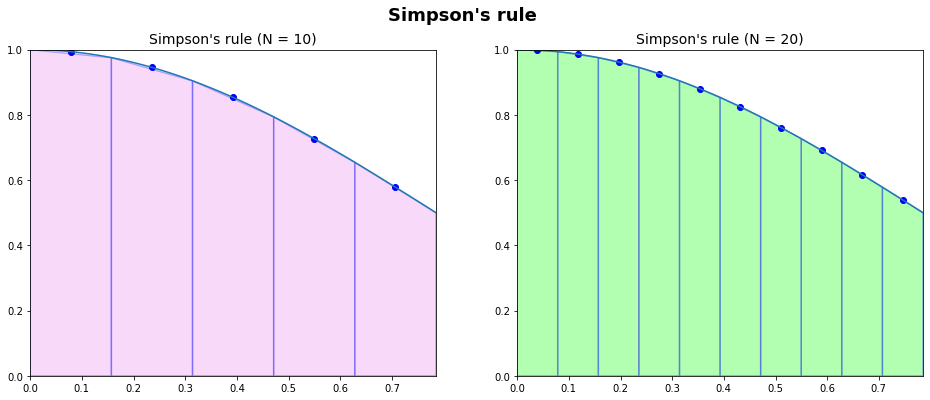

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from IPython.display import display, Latex
from hd_Numerical_Integration_Algorithms import Simps 

f = lambda x : np.cos(x)**2
a =0
b= np.pi/4
N = [10, 20]
#
fig, ax = plt.subplots(nrows=1, ncols=len(N), figsize=(16, 6))
ax = ax.ravel()
Colors = ['Violet', 'Lime']
font = FontProperties()
font.set_weight('bold')
_ = fig.suptitle("""Simpson's rule""", fontproperties=font, fontsize = 18)
for i in range(len(ax)):
    SimpsPlots(f= f, a = a, b= b, N = N[i], ax = ax[i], CL = Colors[i])
    Int_trapz = Simps(f= f, a = a, b= b, N = N[i])
    txt = "\\frac {h}{3} \\sum _{i=1}^{%i}\\left[ f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\\right] = %.4e"
    display(Latex(txt % (N[i]/2, Int_trapz)))
    del Int_trapz
del i

## Error Estimation

```{admonition} Error Estimation: Simpson's rule

```{math}
:label: Simpson_Error
E_{h} = \left|\int _{a}^{b}f(x)\,dx -  \frac {h}{3} \sum _{i=1}^{N/2}\left[ f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right]\right|
 = \frac {(b-a)}{180}h^{4} f^{(4)}(\xi),
 \qquad \text{for some }\xi \in [a, b].
```
```

<font color='Blue'><b>Example</b></font>: Evaluate

\begin{align*}
\int_{0}^{2} \frac{1}{1+x}\, dx.
\end{align*}
using Simpson's rule in a way that error is less than $5 \times 10^{-6}$.

Let's assume that we are interested in evaluing this integral using the Simpson's rule. For instance, to ensure that the error is less than $5 \times 10^{-6}$, we have,

\begin{align*}
f(x) = \frac{1}{x+1} \quad \Rightarrow \quad f'(x) = -\frac{1}{(x + 1)^2} \quad \Rightarrow \quad f''(x) = \frac{2}{(x + 1)^3} .
\end{align*}

In [4]:
E = 5e-6
f = lambda x : 1/(x+1)
f4 =  lambda x : 24/((x+1)**5)
Exact = np.log(3)
a =0
b= 2
x = np.linspace(a, b)
M = max(abs(f4(x)))
display(Latex('''\\max_{%.2f \leq x \leq %.2f}|f^{(4)}(x)| = %.2f''' % (a, b, M)))

<IPython.core.display.Latex object>

It follows from solving the following inequality {eq}`Simpson_Error` that

In [5]:
display(Latex('''\\frac{b -a}{180}h^4 \\max_{a \leq x \leq b}|f^{(4)}(x)| \leq %.2e''' % E))
h = float('%.0e' % np.power(E/(((b-a)/180)*M), 1/4))
display(Latex('''h = %.2e''' % h))
N = int(np.ceil((b-a)/h))
if (N%2 != 0):
    N +=1
display(Latex('''N = %i''' % N))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Therefore,

In [6]:
T = Simps(f, a, b, N)
display(Latex('''E_{h} = %.2e''' % np.abs(Exact - T)))

<IPython.core.display.Latex object>

Moreover, to see the order of accuracy of this method, we can consider the following test.

In [7]:
import pandas as pd
h = [2**(-i) for i in range(3, 10)]

Cols = ['h', 'N', 'Eh']
Table = pd.DataFrame(np.zeros([len(h), len(Cols)], dtype = float), columns=Cols)
Table['h'] = h
Table['N'] = ((b-a)/Table['h']).astype(int)

for i in range(Table.shape[0]):
    Table.loc[i, 'Eh'] = np.abs(Simps(f, a, b, Table['N'][i]) - Exact)
    
display(Table.style.set_properties(subset=['h', 'N'], **{'background-color': 'PaleGreen', 'color': 'Black',
       'border-color': 'DarkGreen'}).format(dict(zip(Table.columns.tolist()[-3:], 3*["{:.4e}"]))))

,h,N,Eh
0,1.2500e-01,1.6000e+01,7.7540e-06
1,6.2500e-02,3.2000e+01,4.9770e-07
2,3.1250e-02,6.4000e+01,3.1323e-08
3,1.5625e-02,1.2800e+02,1.9611e-09
4,7.8125e-03,2.5600e+02,1.2263e-10
5,3.9062e-03,5.1200e+02,7.6648e-12
6,1.9531e-03,1.0240e+03,4.7895e-13


In [9]:
hd.derivative_ConvergenceOrder(vecs = [Table['Eh'].values], labels = ["""Simpson's rule"""], xlabel = r"$$i$$",
                               ylabel = " E_{h_{i}} / E_{h_{i-1}}",
                               title = """Order of accuracy: Simpson's rule""",
                               legend_orientation = 'horizontal')

***
**References:**
1. Allaire, Grégoire, et al. Numerical linear algebra. Vol. 55. New York: Springer, 2008.
1. Burden, Richard L., and J. Douglas Faires. "Numerical analysis 8th ed." Thomson Brooks/Cole (2005).
1. Atkinson, Kendall E. An introduction to numerical analysis. John wiley & sons, 2008.
1. Khoury, Richard, and Douglas Wilhelm Harder. Numerical methods and modelling for engineering. Springer, 2016.
1. Zarowski, Christopher J. An introduction to numerical analysis for electrical and computer engineers. John Wiley & Sons, 2004.
1. [Numerical integration Wikipedia page](https://en.wikipedia.org/wiki/Numerical_integration)
1. [Simpson's rule Wikipedia page](https://en.wikipedia.org/wiki/Simpson%27s_rule)
***